In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import gmean

In [73]:
result_tket = pd.read_csv('./results/result_hamlib_tket.csv')
result_paulihedral = pd.read_csv('./results/result_hamlib_paulihedral.csv')
result_tetris = pd.read_csv('./results/result_hamlib_tetris.csv')
result_phoenix = pd.read_csv('./results/result_hamlib_phoenix.csv')


In [74]:
num_programs = len(result_tket)
programs = result_tket['program']
num_2q_gates = result_tket['num_2q_gates']
depth_2q = result_tket['depth_2q']

In [75]:
def min_disp(arr):
    arr = arr.copy()
    arr[arr < -0.5] = arr.mean()
    return arr.min()

In [76]:
# TODO: SU(4) 数量和深度比较时候是不是应该把原本的input circuit也变成SU(4) （否则50%太trivial）!
result_tket['cnot_num_opt'] =  result_tket['num_2q_gates(opt)'] / result_tket['num_2q_gates']
result_tket['cnot_depth_opt'] =  result_tket['depth_2q(opt)'] / result_tket['depth_2q']
result_tket['su4_num_opt'] = result_tket['num_su4(opt)'] / result_tket['num_su4']
result_tket['su4_depth_opt'] = result_tket['depth_su4(opt)'] / result_tket['depth_su4']

result_paulihedral['cnot_num_opt'] =  result_paulihedral['num_2q_gates(opt)'] / result_paulihedral['num_2q_gates']
result_paulihedral['cnot_depth_opt'] = result_paulihedral['depth_2q(opt)'] / result_paulihedral['depth_2q']
result_paulihedral['su4_num_opt'] =  result_paulihedral['num_su4(opt)'] / result_paulihedral['num_su4']
result_paulihedral['su4_depth_opt'] =  result_paulihedral['depth_su4(opt)'] / result_paulihedral['depth_su4']

result_tetris['cnot_num_opt'] =  result_tetris['num_2q_gates(opt)'] / result_tetris['num_2q_gates']
result_tetris['cnot_depth_opt'] =  result_tetris['depth_2q(opt)'] / result_tetris['depth_2q']
result_tetris['su4_num_opt'] =  result_tetris['num_su4(opt)'] / result_tetris['num_su4']
result_tetris['su4_depth_opt'] =  result_tetris['depth_su4(opt)'] / result_tetris['depth_su4']

result_phoenix['cnot_num_opt'] =  result_phoenix['num_2q_gates(opt)'] / result_phoenix['num_2q_gates']
result_phoenix['cnot_depth_opt'] =  result_phoenix['depth_2q(opt)'] / result_phoenix['depth_2q']
result_phoenix['su4_num_opt'] =  result_phoenix['num_su4(opt)'] / result_phoenix['num_su4']
result_phoenix['su4_depth_opt'] =  result_phoenix['depth_su4(opt)'] / result_phoenix['depth_su4']

In [77]:
result_tket.groupby('category').agg({'cnot_num_opt': gmean, 'su4_num_opt': gmean})

,cnot_num_opt,su4_num_opt
category,,
binaryoptimization,0.868070,1.122803
chemistry,0.566141,0.906935
condensedmatter,0.720108,1.040140
discreteoptimization,0.681717,0.868678


### CNOT ISA comparison

In [78]:
cnot_num_opt = result_tket.groupby('category').agg({'cnot_num_opt': gmean}).to_numpy()
cnot_num_opt = np.hstack((cnot_num_opt, result_paulihedral.groupby('category').agg({'cnot_num_opt': gmean}).to_numpy()))
cnot_num_opt = np.hstack((cnot_num_opt, result_tetris.groupby('category').agg({'cnot_num_opt': gmean}).to_numpy()))
cnot_num_opt = np.hstack((cnot_num_opt, result_phoenix.groupby('category').agg({'cnot_num_opt': gmean}).to_numpy()))

cnot_num_opt = 1 - cnot_num_opt.T


In [79]:
cnot_depth_opt = result_tket.groupby('category').agg({'cnot_depth_opt': gmean}).to_numpy()
cnot_depth_opt = np.hstack((cnot_depth_opt, result_paulihedral.groupby('category').agg({'cnot_depth_opt': gmean}).to_numpy()))
cnot_depth_opt = np.hstack((cnot_depth_opt, result_tetris.groupby('category').agg({'cnot_depth_opt': gmean}).to_numpy()))
cnot_depth_opt = np.hstack((cnot_depth_opt, result_phoenix.groupby('category').agg({'cnot_depth_opt': gmean}).to_numpy()))

cnot_depth_opt = 1 - cnot_depth_opt.T

In [80]:
result_tetris.groupby('category').agg({'cnot_depth_opt': gmean})

,cnot_depth_opt
category,
binaryoptimization,0.520912
chemistry,0.381632
condensedmatter,0.118397
discreteoptimization,1.707265


In [81]:
# result_paulihedral[result_paulihedral['category'] == 'discreteoptimization']

In [82]:
result_tket.groupby('category').agg({'cnot_num_opt': gmean})

,cnot_num_opt
category,
binaryoptimization,0.868070
chemistry,0.566141
condensedmatter,0.720108
discreteoptimization,0.681717


In [83]:
cnot_depth_opt

array([[ 0.15487319,  0.4795137 ,  0.34676372,  0.3269686 ],
       [ 0.69598812,  0.64165106,  0.41235676,  0.59198692],
       [ 0.47908839,  0.61836807,  0.8816034 , -0.70726491],
       [ 0.80005022,  0.75196579,  0.95015781,  0.70009225]])

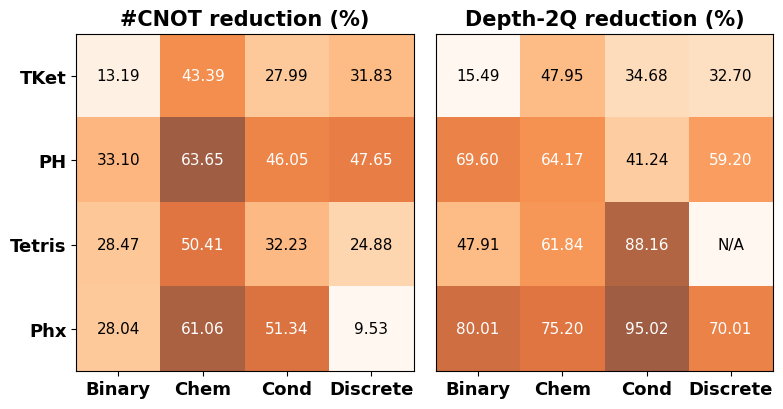

In [84]:
plt.figure(figsize=(8, 4))


# cnot_num_opt
plt.subplot(1, 2, 1)
MIN, MAX = cnot_num_opt.min(), cnot_num_opt.max()
RANGE = MAX - MIN
plt.imshow(cnot_num_opt, cmap='Oranges', interpolation='nearest', alpha=0.75, vmin=MIN, vmax=MAX)
# plt.colorbar(pad=0.01, aspect=15)
colorbar = plt.colorbar(pad=0.01, aspect=15)
colorbar.remove()

for i in range(4):
    for j in range(4):
        percentage = cnot_num_opt[i, j] * 100
        color = 'white' if cnot_num_opt[i, j] - MIN > RANGE / 2 else 'black'
        plt.text(j, i, f'{percentage:.2f}', ha='center', va='center', color=color, fontsize=11)


plt.xticks(np.arange(4), ['Binary', 'Chem', 'Cond', 'Discrete'], fontsize=13, fontweight='bold')
plt.yticks(np.arange(4), ['TKet', 'PH', 'Tetris', 'Phx'], fontsize=13, fontweight='bold')
plt.title('#CNOT reduction (%)', fontsize=15, fontweight='bold')



# cnot_depth_opt
plt.subplot(1, 2, 2)
MIN = min_disp(cnot_depth_opt)
MAX = cnot_depth_opt.max()
RANGE = MAX - MIN
plt.imshow(cnot_depth_opt, cmap='Oranges', interpolation='nearest', alpha=0.75, vmin=MIN, vmax=MAX)
# plt.colorbar(pad=0.03, aspect=15)
colorbar = plt.colorbar(pad=0.01, aspect=15)
colorbar.remove()
# cbar = plt.colorbar(pad=0.03, aspect=15)
# cbar.set_ticks([])
# cbar.set_label('Average Reduction Rate (%)', fontsize=12, fontweight='bold')

for i in range(4):
    for j in range(4):
        percentage = cnot_depth_opt[i, j] * 100
        color = 'white' if cnot_depth_opt[i, j] - MIN > RANGE / 2 else 'black'
        # text = f'{percentage:.2f}' if percentage >= 0 else 'N/A'
        text = 'N/A' if percentage < - 50 else f'{percentage:.2f}'
        plt.text(j, i, text, ha='center', va='center', color=color, fontsize=11)


plt.xticks(np.arange(4), ['Binary', 'Chem', 'Cond', 'Discrete'], fontsize=13, fontweight='bold')
# plt.yticks(np.arange(4), ['TKet', 'PH', 'Tetris', 'Phx'], fontsize=13, fontweight='bold')
plt.yticks([])
plt.title('Depth-2Q reduction (%)', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

In [85]:
cnot_depth_opt

array([[ 0.15487319,  0.4795137 ,  0.34676372,  0.3269686 ],
       [ 0.69598812,  0.64165106,  0.41235676,  0.59198692],
       [ 0.47908839,  0.61836807,  0.8816034 , -0.70726491],
       [ 0.80005022,  0.75196579,  0.95015781,  0.70009225]])

### SU(4) ISA comparison

In [86]:
su4_num_opt = result_tket.groupby('category').agg({'su4_num_opt': gmean}).to_numpy()
su4_num_opt = np.hstack((su4_num_opt, result_paulihedral.groupby('category').agg({'su4_num_opt': gmean}).to_numpy()))
su4_num_opt = np.hstack((su4_num_opt, result_tetris.groupby('category').agg({'su4_num_opt': gmean}).to_numpy()))
su4_num_opt = np.hstack((su4_num_opt, result_phoenix.groupby('category').agg({'su4_num_opt': gmean}).to_numpy()))

su4_num_opt = 1 - su4_num_opt.T


In [87]:
su4_depth_opt = result_tket.groupby('category').agg({'su4_depth_opt': gmean}).to_numpy()
su4_depth_opt = np.hstack((su4_depth_opt, result_paulihedral.groupby('category').agg({'su4_depth_opt': gmean}).to_numpy()))
su4_depth_opt = np.hstack((su4_depth_opt, result_tetris.groupby('category').agg({'su4_depth_opt': gmean}).to_numpy()))
su4_depth_opt = np.hstack((su4_depth_opt, result_phoenix.groupby('category').agg({'su4_depth_opt': gmean}).to_numpy()))

su4_depth_opt = 1 - su4_depth_opt.T

In [88]:
su4_num_opt

array([[-0.12280262,  0.0930647 , -0.04013971,  0.13132177],
       [ 0.43603289,  0.48097937,  0.09974318,  0.40072867],
       [ 0.35175417,  0.09964015, -0.05057689, -0.16568184],
       [ 0.35296968,  0.32518898,  0.30070331, -0.03178894]])

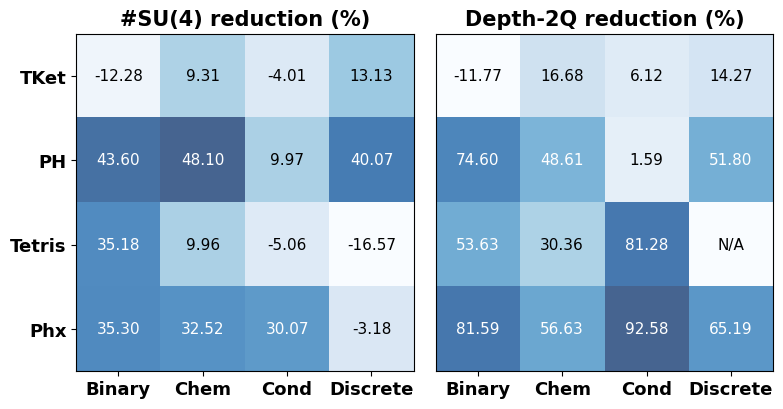

In [89]:
plt.figure(figsize=(8, 4))


# su4_num_opt
plt.subplot(1, 2, 1)
MIN = su4_num_opt.min()
MAX = su4_num_opt.max()
RANGE = MAX - MIN
plt.imshow(su4_num_opt, cmap='Blues', interpolation='nearest', alpha=0.75, vmin=MIN, vmax=MAX)
colorbar = plt.colorbar(pad=0.01, aspect=15)
colorbar.remove()

for i in range(4):
    for j in range(4):
        percentage = su4_num_opt[i, j] * 100
        color = 'white' if su4_num_opt[i, j] - MIN > RANGE / 2 else 'black'
        text = f'{percentage:.2f}'# if percentage >= 0 else 'N/A'
        plt.text(j, i, text, ha='center', va='center', color=color, fontsize=11)

plt.xticks(np.arange(4), ['Binary', 'Chem', 'Cond', 'Discrete'], fontsize=13, fontweight='bold')
plt.yticks(np.arange(4), ['TKet', 'PH', 'Tetris', 'Phx'], fontsize=13, fontweight='bold')
plt.title('#SU(4) reduction (%)', fontsize=15, fontweight='bold')



# su4_depth_opt
plt.subplot(1, 2, 2)
MIN = min_disp(su4_depth_opt)
MAX = su4_depth_opt.max()
RANGE = MAX - MIN
plt.imshow(su4_depth_opt, cmap='Blues', interpolation='nearest', alpha=0.75, vmin=MIN, vmax=MAX)
# plt.colorbar(pad=0.03, aspect=15)
colorbar = plt.colorbar(pad=0.01, aspect=15)
colorbar.remove()
# cbar = plt.colorbar(pad=0.03, aspect=15)
# cbar.set_ticks([])
# cbar.set_label('Average Reduction Rate (%)', fontsize=12, fontweight='bold')

for i in range(4):
    for j in range(4):
        percentage = su4_depth_opt[i, j] * 100
        color = 'white' if su4_depth_opt[i, j] - MIN > RANGE / 2 else 'black'
        text = 'N/A' if percentage < - 50 else f'{percentage:.2f}'
        # text = f'{percentage:.2f}' if percentage >= 0 else 'N/A'
        plt.text(j, i, text, ha='center', va='center', color=color, fontsize=11)


plt.xticks(np.arange(4), ['Binary', 'Chem', 'Cond', 'Discrete'], fontsize=13, fontweight='bold')
# plt.yticks(np.arange(4), ['TKet', 'PH', 'Tetris', 'Phx'], fontsize=13, fontweight='bold')
plt.yticks([])
plt.title('Depth-2Q reduction (%)', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

In [90]:
min_disp(su4_depth_opt)

-0.11766236236900651

In [91]:
su4_depth_opt

array([[-0.11766236,  0.16681811,  0.06118208,  0.14269339],
       [ 0.74601247,  0.48610126,  0.01594651,  0.51801616],
       [ 0.53628754,  0.30362484,  0.81279325, -1.6721612 ],
       [ 0.81590763,  0.56632894,  0.92578706,  0.6519405 ]])

In [92]:
MIN

-0.11766236236900651